<font size ="100" color="red">
Notities Functioneel Programmeren </font>

In [1]:
let listLetters = ['a'..'z']
let listNumbers1 = [1..10]
let listNumbers2 = [11..20]
//bij B is 1 de head, en 2-10 de tail
let listNewHead = 'a' :: listLetters
//Je geeft nieuwe head met CONS OPERATOR

//Lijst voeg je samen met @
let listCombined = listNumbers1 @ listNumbers2

<font size="10">Tuples</font>

In [2]:
let ingredients: string * int = ("Sugar", 25)

//Alleen eerste
printfn $"{fst ingredients}"

//Alle Values
let name, amount = ingredients
printfn $"{name}"
printfn $"{amount}"

//Alleen 1 value
let onlyName, _ = ingredients
printfn $"{onlyName}"

Sugar
Sugar
25
Sugar


<font size="10">First-Class Functions</font>

Een functie is hetzelfde als een normale type   
Functie kan high-order functies, maar niet altijd

In [3]:
let add x y = x + y
let sub x y = x - y

let ops = Map [("add", add); ("sub", sub)]
ops.Item "add" 1 2

3

<font size="10">High-Order Functions</font>  
Een functie die of een functie krijgt, of terug geeft

In [4]:
let funcWithFuncArg (num: int) (func: int -> int) : int = func num

let funcReturningFunc (x: int) : int -> int = fun y -> y + x
let add2 = funcReturningFunc 2
add2 3

5

<font size="10">Function Signatures</font>  
int -> int | Hij krijgt int en geeft int  
string -> int -> string | Krijft string en int, geeft string  
(int -> int) -> int | Krijgt functie met twee ints. en geeft int  
string -> (int -> string) | krijgt string, geeft functie    
int -> int -> string = int -> (int -> string)

<font size="10">Lambda Functions</font>  
Lambda functies zijn anoniem  
Kan gebruikt worden als je een functie maar 1 keer gebruiken  
Definieer je met fun

In [5]:
fun x -> 2 * x
let double = fun x -> 2 * x

funcWithFuncArg 4 double
funcWithFuncArg 4 (fun x -> 2 * x)

8

<font size="10">Function Composition</font>  
Chainen van functies  
Als je twee functies combineert om een nieuwe functie te maken  
Wanneer de output van functie 1, hetzelfde is als de input van functie 2

In [6]:
let greet name = "Hello " + name
let duplicate name = name + " " + name

let ltr = greet >> duplicate
let rtl = greet << duplicate

ltr "bob"
rtl "bob"

let double x = 2 * x
let square x = x * x
let calc x y = square x + double y

calc 3 4

17

<font size="10">Functions as interfaces</font>  

In [7]:
let func (arg: string -> string): string //Een afspraak dat je een string moet krijgen en een string moet geven

Error: input.fsx (1,1)-(1,112) parse error Incomplete structured construct at or before this point in binding. Expected '=' or other token.

In [8]:
type Person(first: string, last: string, title: string) =
    member this.first: string = first
    member this.last: string = last
    member this.title: string = title

let greet strategy person = "Hello " + strategy person //Higher order citizen omdat hij een functie meekrijgt (Formal of Informal)

let formal (person: Person) = person.title + " " + person.last

let informal (person: Person) = person.first

let john = Person("John", "Smith", "Mr.")

greet formal john
greet informal john

Hello John

<font size="10">Statements, Expressions and Grammar</font>

Expressions zijn dingen waar een waard uit komt. Dus 1 + 3 * 5  
Statements komt er niets uit zoals let x = 1 + 3 * 5  
Grammatica een recursieve structuur exploiteren om de structuur de definieren

In [9]:
let x = 1 + 3 * 5

let y = x - 10

Program [Statement]  

Statement:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;let Identifier = Expression  
  
Identifier:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;string of lower case letters without space  
  
Literal:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Identifier  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Integer  

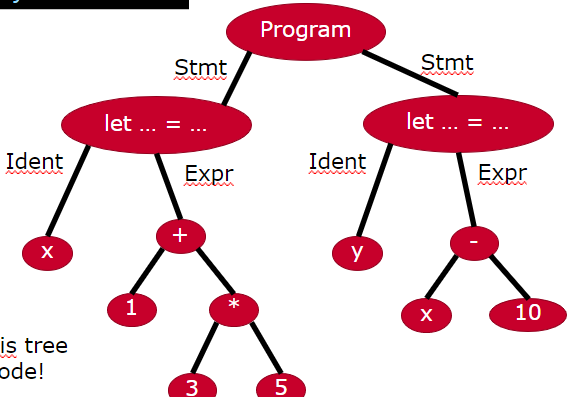

<font size="10">If</font>  
  
If Statements are statements in OO languages, impossible in C#  
But in functional languages it's an expression

In [10]:

let rec evalExpr (expr: string) =
    match expr.Split(['+'; '-'], 2) with
    | [|term|] -> evalTerm term
    | [|left; op; right|] ->
        let lhs = evalExpr left
        let rhs = evalTerm right
        match op with
        | "+" -> lhs + rhs
        | "-" -> lhs - rhs
        | _ -> failwith "Invalid operator"

and evalTerm (term: string) =
    match term.Split(['*'; '/'], 2) with
    | [|factor|] -> evalFactor factor
    | [|left; op; right|] ->
        let lhs = evalTerm left
        let rhs = evalFactor right
        match op with
        | "*" -> lhs * rhs
        | "/" -> lhs / rhs
        | _ -> failwith "Invalid operator"

and evalFactor (factor: string) =
    match factor with
    | "(" + inner + ")" -> evalExpr inner
    | number -> float number

let input = "2 + 3 * (4 - 1) / 2"
let result = evalExpr input

printfn "%s = %f" input result

Error: input.fsx (26,11)-(26,12) parse error Unexpected infix operator in pattern matching. Expected '->' or other token.
input.fsx (3,11)-(3,36) typecheck error No overloads match for method 'Split'.

Known types of arguments: char list * int

Available overloads:
 - String.Split([<ParamArray>] separator: char array) : string array // Argument at index 1 doesn't match
 - String.Split(separator: char array, count: int) : string array // Argument 'separator' doesn't match
 - String.Split(separator: char array, options: StringSplitOptions) : string array // Argument 'separator' doesn't match
 - String.Split(separator: char, ?options: StringSplitOptions) : string array // Argument 'separator' doesn't match
 - String.Split(separator: char, count: int, ?options: StringSplitOptions) : string array // Argument 'separator' doesn't match
 - String.Split(separator: string array, options: StringSplitOptions) : string array // Argument 'separator' doesn't match
 - String.Split(separator: string, ?options: StringSplitOptions) : string array // Argument 'separator' doesn't match
 - String.Split(separator: string, count: int, ?options: StringSplitOptions) : string array // Argument 'separator' doesn't match
input.fsx (3,11)-(3,36) typecheck warning Incomplete pattern matches on this expression.
input.fsx (14,11)-(14,36) typecheck error No overloads match for method 'Split'.

Known types of arguments: char list * int

Available overloads:
 - String.Split([<ParamArray>] separator: char array) : string array // Argument at index 1 doesn't match
 - String.Split(separator: char array, count: int) : string array // Argument 'separator' doesn't match
 - String.Split(separator: char array, options: StringSplitOptions) : string array // Argument 'separator' doesn't match
 - String.Split(separator: char, ?options: StringSplitOptions) : string array // Argument 'separator' doesn't match
 - String.Split(separator: char, count: int, ?options: StringSplitOptions) : string array // Argument 'separator' doesn't match
 - String.Split(separator: string array, options: StringSplitOptions) : string array // Argument 'separator' doesn't match
 - String.Split(separator: string, ?options: StringSplitOptions) : string array // Argument 'separator' doesn't match
 - String.Split(separator: string, count: int, ?options: StringSplitOptions) : string array // Argument 'separator' doesn't match
input.fsx (14,11)-(14,36) typecheck warning Incomplete pattern matches on this expression.

<font size="10">Pattern matching</font>  
Form of conditional branching which allows you to concisely match on data structure patterns and blind variables at the same time  
Denk aan Switch statements  
  
Je kan ook patronen matchen, dus meer advanced dan switch  
Gebruikt voor:  
switch statements  
Type checking  
decomposition  
exceptions

In [11]:
let weirdCalculation t = match t with
    | (0, 0) -> 1
    | (x, y) when x = y -> x / 2
    | (x, y) -> x * y

weirdCalculation(0, 0)

1

In [12]:
type Base() = class end
type DerivedA() = inherit Base()
type DerivedB() = inherit Base()

let what (object: Base) =
    match object with
    | :? DerivedA -> printfn "It's an A"
    | :? DerivedB -> printfn "It's a B"
    | _ -> ()

what (DerivedB())

It's a B


In [13]:
let rec incrementEachElement l = match l with
    | [] -> []
    | head :: tail -> head + 1 :: incrementEachElement tail

incrementEachElement [1;2;3;4]

index,value
0,2
1,3
2,4
3,5


In [14]:
let canStudentsFitInClassroom num = match num with
    | num when num < 5 -> "Very easily"
    | num when num < 25 -> "Easily"
    | num when num < 30 -> "Yes"
    | num when num = 30 -> "Yes, but it's full"
    | num when num < 35 -> "Only if some fit on the floor"
    | _-> "No way!"

canStudentsFitInClassroom 3


Very easily

In [15]:
let canStudentsFitInClassroom num = match num with
    | _-> "No way!"
    | num when num < 5 -> "Very easily"
    | num when num < 25 -> "Easily"
    | num when num < 30 -> "Yes"
    | num when num = 30 -> "Yes, but it's full"
    | num when num < 35 -> "Only if some fit on the floor"

canStudentsFitInClassroom 4

No way!

In [16]:
let size num = match num with
    | num when num < 0 -> "negative"
    | 0 | 1 | 2 | 3 -> "small"
    | _ -> "Large"

size 2

small

In [17]:
let detectZero t = match t with
    | (0,0) -> "both zero"
    | (x, y) & (0,_) -> $"x is 0 and y is {y}"
    | (x, y) & (_, 0) -> $"x is {x} and y is 0"

In [18]:
let x, y = (4, "six")

printfn $"{x} {y}"

4 six


In [19]:
let swap = fun (x, y) -> (y, x)

swap (1, 2)
//Let op! Dit is een tuple. Dit is 1 parameter (x, y). Niet twee

let twoParams = fun x y -> $"ndsnksdcksd"

<font size="5">Exceptions:</font>  

In [20]:
exception SomeError of string
exception OtherError

//
let dealWithIt _ =
    try
        raise (SomeError("Something simple went wrong"))
    with
        | SomeError(msg) -> $"not so bad: {msg}"
        | OtherError -> "Ouch!"

dealWithIt()

not so bad: Something simple went wrong

<font size="10">Recursion</font>  
Wat is recursie  
Tail recursion  
Hoe helpt recursie  
Hoe recursie helpt met immutable data structuren  
Duidelijke en compacte code maken met recursie  

In [21]:
//Rec zegt dat het een recursie is
let rec teachersNeededFor numberOfStudents =
    if numberOfStudents < 30 then 1 //Minder dan 30 studenten, altijd 1
    else 1 + teachersNeededFor (numberOfStudents - 30) // Voeg 1 toe aan de hoeveelheid docenten die er nodig zijn

teachersNeededFor 20
teachersNeededFor 45
teachersNeededFor 163
//Base case is wanneer de recursie stopt -> numberOfStudents < 30

6

<font size="5">StackOverflow</font>  
Each level of recursion adds a call on the stack  
The stack only has a limited amount of memory (ongeveer 1mb)

In [ ]:
let rec teachersNeededFor numberOfStudents =
    if numberOfStudents < 30 then 1
    else 1 + teachersNeededFor (numberOfStudents - 30)

teachersNeededFor 100000000

<font size="6">Tail recursion</font>  
TAIL BLIJFT ALTIJD 1 STACK GROOT!  
Herken je aan het aanroepen van de functie als laatste regel

In [2]:
let rec teachersNeededFor (numberOfStudents: int) (result: int = 0) =
    if numberOfStudents < 30 then result + 1 //Ipv dat je 1 terug geeft, geef je totaal terug + 1
    else teachersNeededFor (numberOfStudents - 30) (result + 1)

teachersNeededFor 100000000

Error: input.fsx (1,64)-(1,65) parse error Unexpected symbol '=' in pattern. Expected ')' or other token.
input.fsx (1,51)-(1,52) parse error Unmatched '('

In [22]:
let rec size l =
    match l with
    | [] -> 0
    | _ :: tail -> 1 + size tail

size [ 7; 4; 2]

3

In [ ]:
let rec addTwoToEachElement l =
    match l with
    | [] -> []
    | head :: tail -> (head + 2) :: addTwoToEachElement tail

addTwoToEachElement [7;4;2]

index,value
0,9
1,6
2,4


Recursie werkt met immutable collecties

In [ ]:
let rec isAscending l =
    match l with
    | [] -> true
    | [_] -> true
    | first :: second :: tail when first < second -> isAscending (second :: tail)
    | _ -> false

$"Correcte volgorde: {isAscending [1; 2; 3; 4]}\nIncorrecte volgorde: {isAscending [1; 2; 4; 3]}"

Correcte volgorde: True
Incorrecte volgorde: False

Foreach / Iter  
Dit is geen methode, maar een methode. Daarom kan ls.iter niet.  
ls stop je in List.iter. Je draait dus niet op ls  
|> is dus een pipe

In [5]:
let ls = [1; 2; 3; 4; 5]

ls |> List.iter (fun x -> printfn "%i" x)

1
2
3
4
5


Filter

In [9]:
let words = ["Hello"; "there"]
let words2 = ["Hello"; "there"; "general kenobi"]

let keepL = List.filter (fun (s: string) -> s.Contains("l"))

words |> keepL // Geeft alleen hello terug
words2 |> keepL //Geeft Hello en general kenobi terug

index,value
0,Hello
1,general kenobi


In [13]:
let ls = [1;2;3;4;5]

ls |> List.map (fun x -> x + 1)

let incList = List.map (fun x -> x + 1)
incList ls

index,value
0,2
1,3
2,4
3,5
4,6


In [14]:
let sentences = ["Hello world!"; "Hi F#!"]

let words (s: string) = (s.Split " ") |> List.ofArray

let simpleMap = List.map words
let collectMap = List.collect words



Reduce past binaire operaties toe van links naar rechts  

In [19]:
let nums = [1;2;3;4;5]

nums |> List.reduce (fun x y -> x + y) //Telt alles op dus uitkomst: 15
nums |> List.reduce (fun x y -> x - y) //Trekt alles af dus uitkomst -13


-13

Fold: Doet hetzelfde maar met alle topics  
Heeft andere signature (state). Krijgt bepaalde type en kan het outputten. Je kan dus een string meegeven en een int laten uitkomen

In [ ]:
type CoinToss = Head | Tails

let playerA = [Tails; Tails; Head]
let playerB = [Head; Tails; Head]

let playGame = List.fold2 (fun acc tossA tossB ->
    match (tossA, tossB))

Forall  
operatie die kijkt of voor een lijst alles waar is.

In [25]:
let words = ["Hello"; "there"]
let words2 = ["Hello"; "there"; "General; Kenobi"]

words |> List.forall (fun word -> word.Length = 5) //True
words2 |> List.forall (fun word -> word.Length = 5) //False

False

Exists  
Doet hetzelfde maar kijkt voor 1

In [26]:
let words = ["Hello"; "there"]
let words2 = ["Hello"; "there"; "General; Kenobi"]

words |> List.exists (fun word -> word.Length = 5) //True
words2 |> List.exists (fun word -> word.Length = 5) //True

True

partition:  
split een lijst in 2 gebaseerd op een condition in een tuple van lijsten. Links is true, rechts is false

In [33]:
let words = ["short"; "loooooong"; "shrt"; "so loooooong"]

words |> List.partition (fun word -> word.Length > 6)

Item1,Item2
"[ loooooong, so loooooong ]","[ short, shrt ]"


pairwise:  
returned een lijst van alle burende paren van values in de originele lijst

In [27]:
let vals = [1;2;3;4;5]

List.pairwise(vals)

index,Item1,Item2
0,1,2
1,2,3
2,3,4
3,4,5


zip:  
stopt 2 lijsten samen in een lijst van tuples

In [28]:
let vals = [1;2;3;4;5]
let words = ["hello"; "there"; "general"; "kenobi"; "I guess"]

List.zip vals words

index,Item1,Item2
0,1,hello
1,2,there
2,3,general
3,4,kenobi
4,5,I guess


_____________________________________________________________________________________________________________________________________________
  Stukje Security 2

In [34]:
(int, int) calculate(int g, int ph, int cc, int sc, int d, int bwc = 84){
    int h = 1;
    int nonce = 1;
    for(int n = 1; (h % d) != 0; n++){
        h = (10 * g * n) % 41 
            + (ph * n) % 43
            + (cc * n) % 47
            + (sc * n) % 53
            + (bwc * n) % 59;
        n++;
        nonce = n;
    }
    return (h, nonce);
}

Console.WriteLine(calculate(8, 93, 'C', 'E', 'T'));

(168, 10)


Eindigt hier  
_____________________________________________________________________________________________________________________________________________

<font size="10">Sum & Product types</font>  

Wat is een type?  
Een set van alle mogelijke waarden  
Een set is een verzameling van unieke variabelen: true false is 1 set (boolean), 0 1 -4 18349 (integer), etc  


Product types:  
Stel je hebt een een tuple van boolean * int  
true,false * [alle getallen] = Cartesian product
Cartesian product is dus een combinatie van alle mogelijke combinaties

Sum types:  
Als je twee sets optelt, krijg je sum types -> Union = boolean + int  
Union = true,false + [alle getallen]  
Deze noem je discriminated unions in F#

Discriminated unions:  


In [3]:
type BasicEnum = 
    | CaseA
    | CaseB

let a: BasicEnum = CaseA
let b: BasicEnum = CaseB

match a with
    | CaseA -> printfn "It's a!"
    | CaseB -> printfn "It's B!"



It's a!


In [4]:
type BoolOrInt =
    | CaseBool of bool
    | CaseInt of int

let b: BoolOrInt = CaseBool true
let i: BoolOrInt = CaseInt 42

match b with
    | CaseBool b -> printfn "It's a boolean"
    | CaseBool i -> printfn "It's an int"

It's a boolean


Options

In [6]:
let some: int Option = Some 5
let none: int Option = None

let rec last (ls: int list) =
    match ls with
        | [] -> None
        | head :: [] -> Some head
        | _ :: tail -> last tail

last [1;2;3;4;5;6]

Value
6


Map

In [12]:
let m = Map [("France", "Paris");("Belgium", "Brussels");("The Netherlands", "Amsterdam")]

m.Item "France"
//m.Item "Germany" //werk niet

let retrieve (map: Map<string,string>) (key:string): string Option =
    try
        let item = map.Item key
        Some item
    with
        | ex -> None

let a = retrieve m "France"
let b = retrieve m "Germany"

$"France gives: {a}\nGermany gives: {b}\nbecause it's not in the map"

France gives: Some(Paris)
Germany gives: 
because it's not in the map

<font size="10">Railway Oriented Programming</font>  

Basic exceptions in F#  

In [16]:
//Maak exception aan
exception MyException of string

//Gaat fout. roep een exception aan
let func n = 
    if n>10 then n - 10
    else raise (MyException "I failed")

//Try catch in F#
let result =
    try
        func 3
    with
        | ex -> 0

Dit is niet netjes omdat je je doel niet makkelijk eruit kan afleiden

In [19]:
let validate = fun 1 2 -> 1 + 2
let updateDb = fun 2 3 -> 2 + 3 
let sendEmail = fun 3 4 -> 3 + 4

let handleUseCase = validate >> updateDb >> sendEmail

Error: input.fsx (1,22)-(1,23) typecheck warning Incomplete pattern matches on this expression. For example, the value '0' may indicate a case not covered by the pattern(s).
input.fsx (1,20)-(1,21) typecheck warning Incomplete pattern matches on this expression. For example, the value '0' may indicate a case not covered by the pattern(s).
input.fsx (2,22)-(2,23) typecheck warning Incomplete pattern matches on this expression. For example, the value '0' may indicate a case not covered by the pattern(s).
input.fsx (2,20)-(2,21) typecheck warning Incomplete pattern matches on this expression. For example, the value '0' may indicate a case not covered by the pattern(s).
input.fsx (3,23)-(3,24) typecheck warning Incomplete pattern matches on this expression. For example, the value '0' may indicate a case not covered by the pattern(s).
input.fsx (3,21)-(3,22) typecheck warning Incomplete pattern matches on this expression. For example, the value '0' may indicate a case not covered by the pattern(s).
input.fsx (5,33)-(5,41) typecheck error Type mismatch. Expecting a
    '(int -> int) -> int'    
but given a
    'int -> int -> int'    
The type 'int -> int' does not match the type 'int'

Railway: Spoor splits in twee. rechtdoor is happy result, afslaan is failure result  
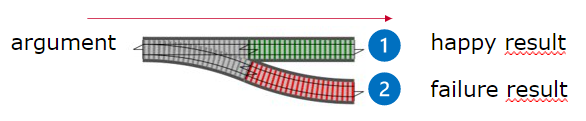

In [23]:
type Result<'T, 'TError> = 
    | OK of ResultValue: 'T
    | Error of ErrorValue: 'TError

In [24]:
let validate (inResult: Result<string, string>) =
    match inResult with
        | Ok request when request.Length > 5 then Ok request
        | Ok _ then Error "Request is invalud"
        | Error value -> Error value

Error: input.fsx (3,46)-(3,50) parse error Unexpected keyword 'then' in pattern matching. Expected '->' or other token.

Het ziet er nu zo uit:  
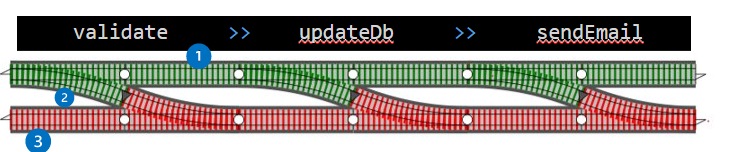 

Nu moet je dus altijd het spoor volgen. Dit wil je niet altijd daarom gebruik je een connect:  
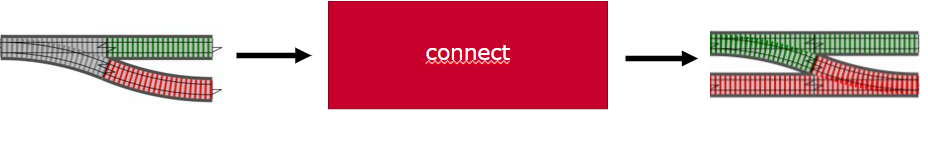

In [25]:
let connect func inResult =
    match inResult with
        | Ok value -> func value
        | Error value -> Error value

Error: input.fsx (4,11)-(4,22) typecheck error This expression was expected to have type
    'Result<'a,'c>'    
but here has type
    'Result<'b,'d>'    

Ziet er nu zo uit:  
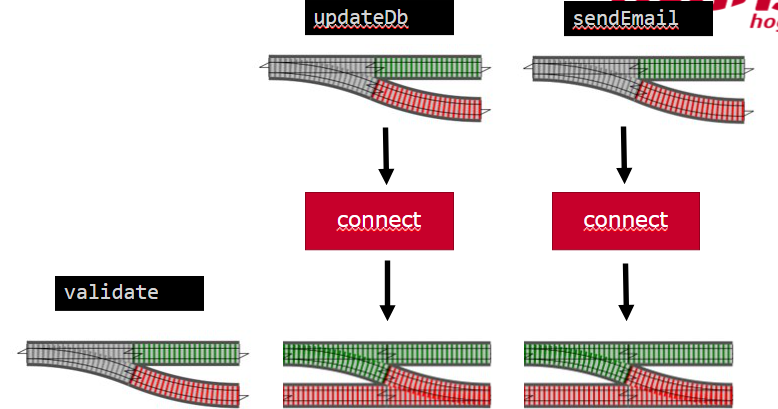

<font size="5">Scope</font>  
Waar de variabelen beschikbaar zijn voor gebruik

Lexical of Static scope:  
Als een variabele binnen een geneste functie wordt aangemaakt, is het alleen daar binnen beschikbaar

Dynamic scope:  
Als je een functie aanroept waarbinnen variabelen worden aangemaakt, worden alle variabelen binnen de functie open gezet voor gebruik.

Lexical scope met higher order functions:  
Als je een higher order function aanroept, kun je de scope van die function gebruiken??

In [2]:
let makeCounter () =
    let mutable count = 0
    fun () ->
        count <- count + 1
        count

let counter = makeCounter()
counter() //1
counter() //2
counter() //3

let other = makeCounter()
other() //1
other() //2
other() //3

3

Closure zorgt ervoor dat de state wordt onthouden binnen de let counter en de let other

In [8]:
let makeGreeter greeting =
    fun name -> greeting + name

let greetWithHello = makeGreeter "Hello "
let greetWithHi = makeGreeter "Hi "

greetWithHello "Lisa" //Hello Lisa
greetWithHi "Lisa" //Hi Lisa

Hello John

In [4]:
let ls = [1;2;3;4]

let treshold = 3

List.filter (fun item -> item < treshold) ls

index,value
0,1
1,2


In [6]:
let arr = [|1;2;3;4|]

let treshold = 3

let result = [|0;0;0;0;|]

for i = 0 to arr.Length - 1 do
    if arr.[i] < treshold then
        result.[i] <- arr.[i]

result

index,value
0,1
1,2
2,0
3,0


In [ ]:
//Voorbeeld met database connectie:

let createQueryEngine url =
    let connectuin = connect url

    fun query ->
        connection.Open ()
        let result = connection.Run query
        connection.Close ()
        result

let createRepeatableQuery url query =
    let engine = createQueryEngine url
    fun () -> engine query

let getUsers = createRepeatableQuery "localhost://4040" "SELECT * FROM users"
getUsers() //Run query
//Een repository maar functioneel

In [ ]:
let createObservable () =
    let mutable subscribers = []

    let subscribe subscriber = 
        subscribers <- subscriber :: subscribers

    let publish message = 
        subsribers |> List.iter (fun s -> s message)

    (publish, subscribe)

let pub, sub = createObservable()

sub (printfn "Subscriber A: %s")
sub (printfn "Subscriber B: %s")



<font size="5">Monoids</font>  
properties:  
Als je twee cijfers bij elkaar toevoegt krijg je 1 cijfer  
x + 0 = x. Er is een neutrale element  
de volgorde van de getallen maakt niet uit voor de uitkomst: 1 + 2 + 3 = 2 + 3 + 1

In [10]:
let ls = [1..5]

List.sum ls

List.fold (+) 0 ls

15

In [11]:
let ls = ["a"; "b"; "c"; "d"; "e"]

List.fold (+) "" ls

abcde

In [17]:
let inc x = x + 1
let double x = 2 * x
let square x = x * x

let ls = [inc;double;square;]

//de >> is de monoid van functies
let composed = List.fold (>>) (fun x -> x) ls
composed 0 //((0 + 1) * 2) ^ 2 = 4

4

In [18]:
type ProductLine = {
    Name: string
    Quantity: int
    Price: float
}

type TotalLine = {
    Quantity: int
    TotalPrice: float
}

type OrderLine = 
    | Product of ProductLine
    | Total of TotalLine
    | EmptyLine

let printLine line = 
    match line with
        | EmptyLine -> printfn " --- "

        | Product product -> printfn "%s: %i * %.2f = %.2f" product.Name product.Quantity product.Price (float product.Quantity * product.Price)

        | Total total -> printfn "Total: %i items: - € %.2f" total.Quantity total.TotalPrice

let addLine lineA lineB =
    match lineA, lineB with
        | EmptyLine, _ -> lineB
        | _, EmptyLine -> lineA
        | Product a, Product b ->
            Total {
                Quantity = a.Quantity + b.Quantity
                TotalPrice = float a.Quantity * a.Price + float b.Quantity * b.Price
            }

        | Total totalA, Total totalB ->
            Total {
                Quantity = totalA.Quantity + totalB.Quantity
                TotalPrice = totalA.TotalPrice + totalB.TotalPrice
            }

        | _ -> EmptyLine